# Neural Network

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import sklearn.preprocessing
import sklearn.metrics
import imblearn.over_sampling
import spectraldl.plot as plot
import spectraldl.preprocessing as preprocessing
import tensorflow.contrib.keras as keras

In [3]:
with h5py.File('data/data.hdf5') as f:
    X_tr_ = f['X_tr'][...]
    y_tr_ = f['y_tr'][...]
    X_val_ = f['X_val'][...]
    y_val_ = f['y_val'][...]

In [4]:
def plot_hist(hist):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(hist.epoch, hist.history['acc'], label='training data')
    ax1.plot(hist.epoch, hist.history['val_acc'], label='validation data')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.legend()
    ax2.plot(hist.epoch, hist.history['loss'])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    fig.tight_layout()

def plot_cm(model, X_val, y_val):
    y_out = model.predict_classes(X_val, verbose=0)
    cm = sklearn.metrics.confusion_matrix(y_val, y_out)
    classes = ['emission', 'absorption', 'double-peak']
    plot.plot_confusion_matrix(cm, classes, normalize=True)

## Deep Neural Net

/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


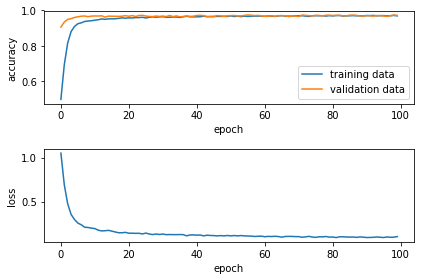

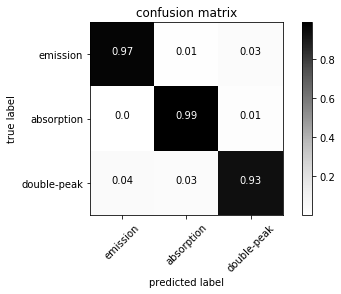

In [5]:
dnn_model = keras.models.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(140, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=3, activation='softmax'),
])

dnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# variables ending with _ (underscore) hold original data
X_tr, X_val = np.copy(X_tr_), np.copy(X_val_)
y_tr, y_val = np.copy(y_tr_), np.copy(y_val_)

# preprocessing
X_tr, X_val = preprocessing.scale_samples(X_tr, X_val)
X_tr, y_tr = preprocessing.smote_over_sample(X_tr, y_tr, n_classes=3)

# oh stands fo one hot vector
y_tr_oh = keras.utils.to_categorical(y_tr, num_classes=3)
y_val_oh = keras.utils.to_categorical(y_val, num_classes=3)

# train the model
dnn_hist = dnn_model.fit(
    X_tr, y_tr_oh,
    epochs=100, batch_size=256, verbose=0,
    validation_data=(X_val, y_val_oh)
)

# vizualize traing resutls
plot_hist(dnn_hist)
plt.show()
plot_cm(dnn_model, X_val, y_val)

## ConvNet

/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


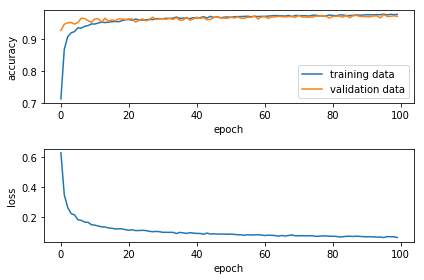

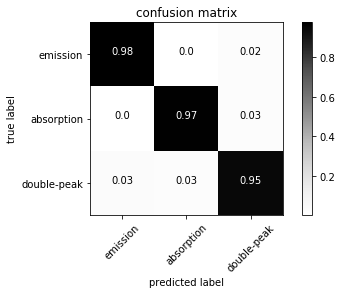

In [6]:
# variables ending with _ (underscore) hold original data
X_tr, X_val = np.copy(X_tr_), np.copy(X_val_)
y_tr, y_val = np.copy(y_tr_), np.copy(y_val_)

# preprocessing
X_tr, X_val = preprocessing.scale_samples(X_tr, X_val)
X_tr, y_tr = preprocessing.smote_over_sample(X_tr, y_tr, n_classes=3)

# oh stands fo one hot vector
y_tr_oh = keras.utils.to_categorical(y_tr, num_classes=3)
y_val_oh = keras.utils.to_categorical(y_val, num_classes=3)

HEIGHT = 1
WIDTH = 140
DEPTH = 1
X_tr = X_tr.reshape(-1, HEIGHT, WIDTH, DEPTH)
X_val = X_val.reshape(-1, HEIGHT, WIDTH, DEPTH)

input_shape = X_tr.shape[1:]

conv_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (1, 10), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, (1, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128, (1, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

conv_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# training
conv_hist = conv_model.fit(
    X_tr, y_tr_oh,
    epochs=100, batch_size=256, verbose=0,
    validation_data=(X_val, y_val_oh)
)

# vizualize traing resutls
plot_hist(conv_hist)
plt.show()
plot_cm(conv_model, X_val, y_val)